In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_squared_error,r2_score

In [78]:
dataset=pd.read_csv('housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
dataset.size

206400

In [80]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### As bedrooms has 207 null values.As we can see bedrooms is strong predictor so we can not drop the column as well as we can not drop the rows as we will lose a large amount of data.so we have to fill these null values.with mean of bedrooms column.

In [81]:
total_bedrooms_mean=dataset['total_bedrooms'].mean()

In [82]:
dataset['total_bedrooms'].fillna(total_bedrooms_mean,inplace=True)

C:\Users\sk021\AppData\Local\Temp\ipykernel_15988\3521808116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['total_bedrooms'].fillna(total_bedrooms_mean,inplace=True)


In [83]:
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## As we can see that ocean_proximity hase string values so we have to uncode them using label encoder

In [84]:
dataset['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le_encoder=LabelEncoder()
dataset['ocean_proximity']=le_encoder.fit_transform(dataset['ocean_proximity'])

In [87]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


### Lets vasualize correaltions

In [88]:
corr=dataset.corr()

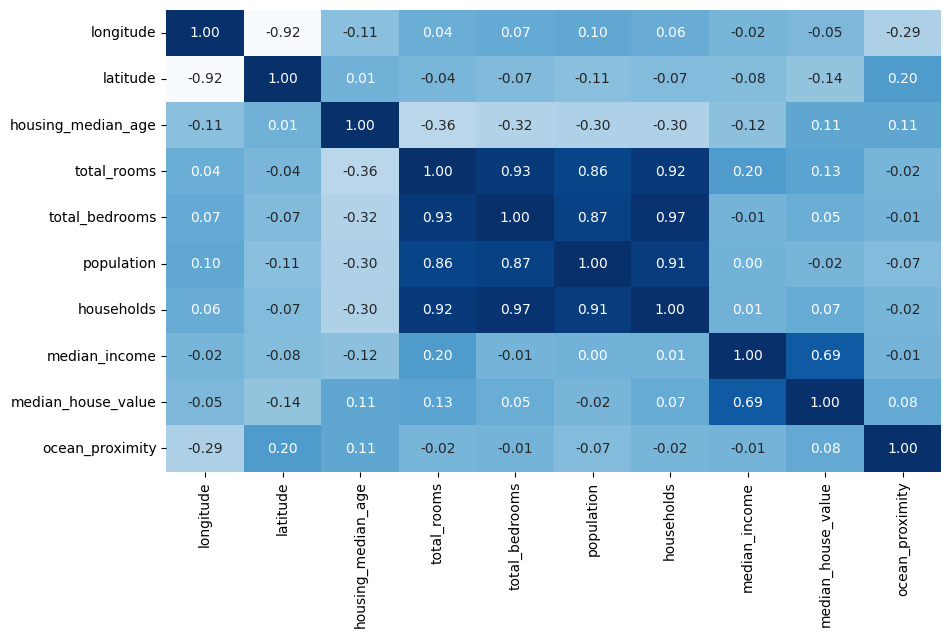

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='Blues',cbar=False)
plt.show()

## Define dependent and independent variable

In [90]:
x=dataset.drop('median_house_value',axis=1)
y=dataset['median_house_value']

## Split data set into train and test set 

In [91]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [92]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,0
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,4
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,4
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,1
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,3
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0


In [93]:
y_train

7061     193800.0
14689    169700.0
17323    259800.0
10056    136100.0
15750    500001.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 14448, dtype: float64

In [94]:
from sklearn.linear_model import LinearRegression

In [124]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [111]:
MAE=mean_absolute_error(y_pred,y_test)
MAE

51078.006785156875

In [121]:
MSE=mean_squared_error(y_pred,y_test)
MSE

4854757886.837101

In [122]:
RMSE=root_mean_squared_error(y_pred,y_test)
RMSE

69676.09264903638

In [128]:
r2score=r2_score(y_pred,y_test)
r2score

0.4235273708813867

## As we can see that model is trained very poorly.Lets scale the feaure and evaluate the model

In [149]:
dataset.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3


In [147]:
from sklearn.preprocessing import StandardScaler

In [180]:
lo_encode=StandardScaler()
dataset['longitude']=lo_encode.fit_transform(dataset['longitude'].values.reshape(-1,1))

In [181]:
la_encoder=StandardScaler()
dataset['latitude']=la_encoder.fit_transform(dataset['latitude'].values.reshape(-1,1))

In [182]:
ho_encoder=StandardScaler()
dataset['housing_median_age']=ho_encoder.fit_transform(dataset['housing_median_age'].values.reshape(-1,1))

In [183]:
ro_encoder=StandardScaler()
dataset['total_rooms']=ro_encoder.fit_transform(dataset['total_rooms'].values.reshape(-1,1))

In [184]:
be_encoder=StandardScaler()
dataset['total_bedrooms']=be_encoder.fit_transform(dataset['total_bedrooms'].values.reshape(-1,1))

In [185]:
po_encoder=StandardScaler()
dataset['population']=po_encoder.fit_transform(dataset['population'].values.reshape(-1,1))

In [186]:
hos_encoder=StandardScaler()
dataset['households']=hos_encoder.fit_transform(dataset['households'].values.reshape(-1,1))

In [187]:
me_encoder=StandardScaler()
dataset['median_income']=me_encoder.fit_transform(dataset['median_income'].values.reshape(-1,1))

In [188]:
hv_encoder=StandardScaler()
dataset['median_house_value']=hv_encoder.fit_transform(dataset['median_house_value'].values.reshape(-1,1))

In [189]:
op_encoder=StandardScaler()
dataset['ocean_proximity']=op_encoder.fit_transform(dataset['ocean_proximity'].values.reshape(-1,1))

In [190]:
x=dataset.drop('median_house_value',axis=1)
y=dataset['median_house_value']

In [191]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [192]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [193]:
y_pred=model.predict(X_test)

In [194]:
mae=mean_absolute_error(y_pred,y_test)
mae

0.44264458227361275

In [195]:
mse=mean_squared_error(y_pred,y_test)
mse

0.3645944044726542

In [196]:
rmse=root_mean_squared_error(y_pred,y_test)
rmse

0.6038165321293002

In [197]:
r_score=r2_score(y_pred,y_test)
r_score

0.42352737088136305

## Plot Actual values and predicted values and draw regression line

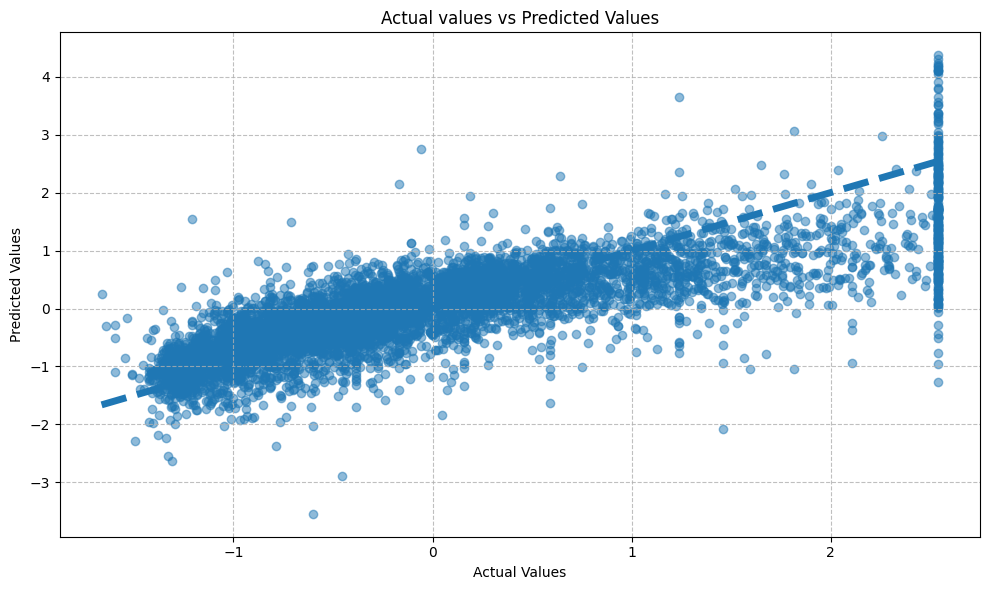

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',linewidth=5
)
plt.title('Actual values vs Predicted Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.savefig("California_housing_regression.png",dpi=300)
plt.show()